In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def bootstrap(x, resamples=1000):
    """Draw bootstrap resamples from the array x.

       Parameters
       ----------
       x: np.array, shape (n, )
         The data to draw the bootstrap samples from.
       
       resamples: int
         The number of bootstrap samples to draw from x.
       
       Returns
       -------
       bootstrap_samples: np.array, shape (resamples, n)
         The bootsrap resamples from x.
    """
    obj = x.shape[0] # should = 5
    samples = []
    for k in range(resamples):
        idx = np.random.randint(obj, size=obj)
        boot_samp = x[idx]
        samples.append(boot_samp)
    return np.array(samples)

In [3]:
# Generate population sample
data = np.random.randn(5) 

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

# Boostrap from samples
samples = bootstrap(data)

print(samples)
print(f'\n1,000 arrays of 5 bootstrap samples (arrays): {samples.shape}')

[[ 0.97043958  0.08116311  0.08116311  0.97043958  0.97043958]
 [ 0.97043958  1.53426565  0.08116311 -1.52996123 -1.52996123]
 [ 0.27982927  1.53426565  0.08116311 -1.52996123  1.53426565]
 ...
 [ 0.97043958  0.08116311 -1.52996123 -1.52996123  0.08116311]
 [ 0.97043958  0.27982927 -1.52996123  0.08116311  0.08116311]
 [ 0.08116311 -1.52996123  0.08116311  0.27982927  0.97043958]]

1,000 arrays of 5 bootstrap samples (arrays): (1000, 5)


In [5]:
data.shape[0]

5

In [6]:
productivity_path = 'data/productivity.txt'
data = np.loadtxt(productivity_path)

In [7]:
print(data)

[-19.1 -15.2 -12.4 -15.4  -8.7  -6.7  -5.9  -3.5  -3.1  -2.1   4.2   6.1
   7.    9.1  10.   10.3  13.2  10.1  14.1  14.4  20.1  26.3  27.7  22.2
  23.4]


In [8]:
def bootstrap_ci(sample, stat_function=np.mean, resamples=1000, ci=95):
    """Calculate the CI of chosen sample statistic using bootstrap sampling.

    CI = confidence interval

    Parameters
    ----------
    sample: Numpy array
        1-d numeric data

    stat_function: function, optional (default=np.mean)
        Function for calculating as sample statistic on data

    iterations: int, optional (default=1000)
        Number of bootstrap samples to create

    ci: int, optional (default=95)
        Percent of distribution encompassed by CI, 0<ci<100

    Returns
    -------
    tuple: lower_ci(float), upper_ci(float), bootstrap_samples_statistic(array)
        Lower and upper bounds of CI, sample stat from each bootstrap sample
    """
    # Generate bootstrapped samples
    samps = bootstrap(sample, resamples=resamples)
    
    # Calculate sample statistics on bootstrapped samples
    samp_stat = list(map(stat_function, samps))
    # https://docs.python.org/3/library/functions.html#map
    
    # Return the sample statistics, two percentile bounds
    return samp_stat, np.percentile(samp_stat, (100-ci)/2), np.percentile(samp_stat, 100 - (100-ci)/2)

In [10]:
bootstrap_means, lower_ci, upper_ci = bootstrap_ci(data)

print(f'\n95% bootstrapped CI of the mean: ({lower_ci}, {upper_ci})')


95% bootstrapped CI of the mean: (-0.25309999999999944, 10.0732)


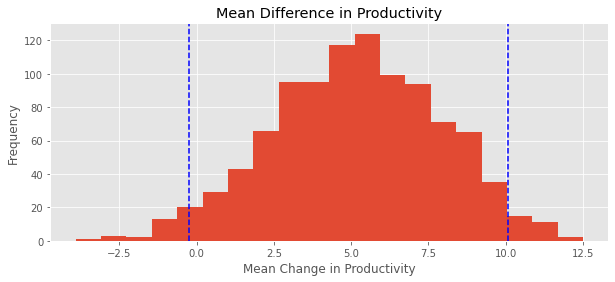

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(bootstrap_means, bins=20)
ax.set_xlabel('Mean Change in Productivity')
ax.set_ylabel('Frequency')
ax.set_title('Mean Difference in Productivity')
ax.axvline(lower_ci, linestyle='--', c='b')
ax.axvline(upper_ci, linestyle='--', c='b')
plt.show()

In [12]:
boostrap_means2, lower_ci2, upper_ci2 = bootstrap_ci(data, ci=90)
print(f'\n90% bootstrapped CI of the mean: ({lower_ci2}, {upper_ci2})')


90% bootstrapped CI of the mean: (0.9262000000000002, 9.464999999999998)


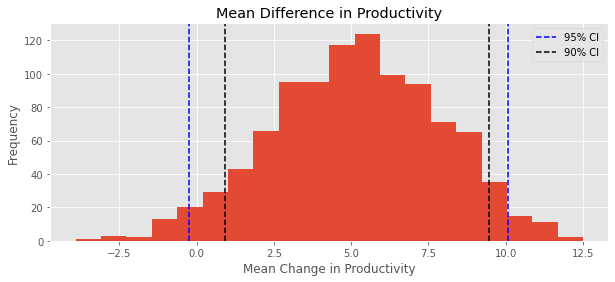

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(bootstrap_means, bins=20)
ax.set_xlabel('Mean Change in Productivity')
ax.set_ylabel('Frequency')
ax.set_title('Mean Difference in Productivity')
ax.axvline(lower_ci, linestyle='--', c='b', label='95% CI')
ax.axvline(lower_ci2, linestyle='--', c='black', label='90% CI')
ax.axvline(upper_ci, linestyle='--', c='b')
ax.axvline(upper_ci2, linestyle='--', c='black')
ax.legend()
plt.show()

Suppose there are 100 programmers in the company. The cost of changing a monitor is 500 and the increase of one unit of productivity is worth 2,000, would you recommend switching the monitors? State the assumptions you are making and show your work.

Based off our 95% CI, there is statistical evidence for a decrease in productivity so no, we would not recommend switching the monitors.

Based off our 90% CI, the minimum expecteded average improvement is the lower bound of our CI: ~0.6

Therefore we have an average improvement of 0.6 per person"

0.6 units/person * 100 people = 60 units productivity

Cost of new monitors: 100 * 500 = 50,000

Increase in productivity worth: 2,000 * 60 = 120,000

Profit: 120,000 - 50,000 = 70,000

# Advanced Section of Assignment

In [14]:
law_path = 'data/law_sample.txt'
data2 = np.loadtxt(law_path)
print(f'15 Schools, 2 columns for mean LSAT and mean GPA: {data2.shape}')

15 Schools, 2 columns for mean LSAT and mean GPA: (15, 2)


In [15]:
corr, p_value = stats.pearsonr(data2[:,0], data2[:,1])
print(f"Pearson's Correlation: {corr} \nP-value: {p_value}")

Pearson's Correlation: 0.776374491289407 
P-value: 0.0006651020111028156


In [16]:
bootstrap_means3, lower_ci3, upper_ci3 = bootstrap_ci(data2, 
    stat_function=(lambda x: stats.pearsonr(x[:,0], x[:,1])[0]),
    resamples=1000, ci=95)
print(f'\n95% bootstrapped CI of the mean: ({lower_ci3}, {upper_ci3})')


95% bootstrapped CI of the mean: (0.46582530544748196, 0.9595544087271863)


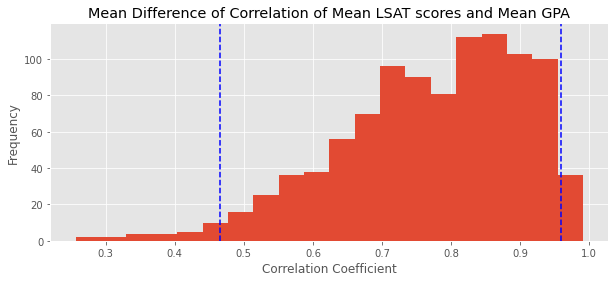

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(bootstrap_means3, bins=20)
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Frequency')
ax.set_title('Mean Difference of Correlation of Mean LSAT scores and Mean GPA')
ax.axvline(lower_ci3, linestyle='--', c='b')
ax.axvline(upper_ci3, linestyle='--', c='b')
plt.show()

In [18]:
law_path2 = 'data/law_all.txt'
data3 = np.loadtxt(law_path2)
print(f'82 Schools, 2 columns for mean LSAT and mean GPA: {data3.shape}')

82 Schools, 2 columns for mean LSAT and mean GPA: (82, 2)


In [19]:
corr2, p_value2 = stats.pearsonr(data3[:,0], data3[:,1])
print(f"Pearson's Correlation: {corr2} \nP-value: {p_value2}")

Pearson's Correlation: 0.7599978555038982 
P-value: 1.240290331011239e-16
